In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
final_match = pd.read_csv("/content/drive/MyDrive/ML_project/matches_with_points.csv")
player_points = pd.read_csv("/content/drive/MyDrive/ML_project/player_points.csv")
team_player = pd.read_csv("/content/drive/MyDrive/ML_project/team_player_df.csv")

In [4]:
final_match.head()

,Unnamed: 0,id,city,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2,yr,team1_points,team2_points
0,0,335982,Bangalore,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,Asad Rauf,RE Koertzen,2008,1595.5,1535.5
1,1,335983,Chandigarh,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,MR Benson,SL Shastri,2008,2006.5,2032.0
2,2,335984,Delhi,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,Aleem Dar,GA Pratapkumar,2008,1796.5,2214.5
3,3,335985,Mumbai,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,SJ Davis,DJ Harper,2008,1849.5,1595.5
4,4,335986,Kolkata,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,BF Bowden,K Hariharan,2008,1535.5,1738.0


In [5]:
player_points.head(20)

,Unnamed: 0,Z Khan,JH Kallis,SB Joshi,BB McCullum,RT Ponting,P Kumar,DJ Hussey,AA Noffke,CL White,Mohammad Hafeez,SC Ganguly,AB Agarkar,MV Boucher,M Kartik,WP Saha,LR Shukla,I Sharma,AB Dinda,K Goel,JDP Oram,MEK Hussey,JR Hopes,MS Gony,PP Chawla,SK Raina,WA Mota,IK Pathan,S Badrinath,B Lee,ML Hayden,PA Patel,S Sreesanth,KC Sangakkara,M Muralitharan,P Amarnath,Joginder Sharma,Yuvraj Singh,SM Katich,GD McGrath,...,Milind Kumar (sub),Arshdeep Singh,SE Rutherford,Harpreet Brar,Y Prithvi Raj,O Thomas,AS Roy,S Sandeep Warrier,P Simran Singh,Anmolpreet Singh (sub),JL Pattinson,SS Cottrell,A Nortje,Ravi Bishnoi,I Udana,T Banton,D Padikkal,PK Garg,YBK Jaiswal,TU Deshpande,KL Nagarkoti,Abdul Samad,JR Philippe,Kartik Tyagi,DR Sams,Shahbaz Ahmed,RD Gaikwad,AT Carey,AS Roy (sub),JR Hazlewood,CJ Green (sub),PK Garg (sub),SP Goswami (sub),N Jagadeesan,CJ Green,P Dubey,Lalit Yadav (sub),Monu Kumar,P Negi (sub),KMA Paul (sub)
0,2008,161.5,148.0,21.5,87.5,13.5,202.0,154.0,12.0,41.5,56.0,218.0,113.5,91.0,66.0,79.5,104.0,142.0,157.0,38.5,64.0,73.5,177.0,235.0,224.5,186.5,16.5,273.5,93.0,72.5,81.0,130.5,203.5,140.5,175.5,58.5,90.5,166.5,34.5,209.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,78.5,268.5,NaN,124.5,NaN,203.0,51.5,NaN,NaN,NaN,85.0,111.0,58.5,97.0,26.5,81.0,177.0,90.5,65.0,88.0,NaN,NaN,63.0,175.5,268.5,39.0,259.5,76.5,101.0,239.5,62.0,85.5,110.0,212.5,NaN,19.5,200.0,63.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,191.0,384.5,NaN,47.0,NaN,153.5,53.0,NaN,30.0,NaN,217.0,66.5,16.0,127.0,41.0,46.5,81.0,106.0,12.0,NaN,5.0,NaN,23.0,164.5,279.0,NaN,255.0,122.5,27.5,163.5,27.0,70.5,162.5,181.0,NaN,23.5,170.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,208.5,244.0,NaN,148.5,NaN,185.5,40.5,NaN,27.0,NaN,17.0,80.0,2.5,52.0,24.0,5.0,167.0,58.5,NaN,11.5,168.5,150.5,31.0,168.5,236.5,NaN,230.5,129.0,141.0,NaN,92.0,121.0,175.0,55.5,NaN,5.0,225.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,234.5,293.0,NaN,140.5,NaN,221.0,164.0,NaN,181.0,NaN,124.5,39.0,NaN,103.5,NaN,51.0,NaN,98.5,NaN,NaN,108.0,NaN,74.5,228.5,209.5,NaN,256.0,72.0,145.0,NaN,76.5,NaN,89.0,137.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2013,35.5,284.0,NaN,2.5,16.0,221.0,100.0,NaN,103.0,NaN,NaN,19.5,NaN,119.5,29.0,15.5,231.0,178.0,NaN,11.0,287.0,NaN,107.0,178.5,218.5,NaN,213.0,30.0,60.0,NaN,126.5,88.0,40.0,55.0,NaN,NaN,150.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014,80.5,104.5,NaN,161.5,NaN,47.0,55.5,NaN,NaN,NaN,NaN,NaN,NaN,19.5,175.5,36.5,36.5,81.5,NaN,NaN,74.5,NaN,NaN,146.5,261.5,NaN,79.5,NaN,NaN,NaN,108.5,NaN,NaN,50.0,NaN,NaN,214.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,101.0,NaN,NaN,213.0,NaN,105.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,NaN,33.5,6.5,NaN,NaN,25.5,NaN,NaN,131.5,193.0,NaN,NaN,NaN,NaN,NaN,160.0,NaN,NaN,NaN,NaN,NaN,112.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016,155.5,NaN,NaN,151.0,NaN,179.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,52.5,129.5,NaN,NaN,NaN,NaN,NaN,140.5,165.0,NaN,20.5,NaN,NaN,NaN,96.5,NaN,NaN,NaN,

In [6]:
team_player.head()

,Unnamed: 0,Kolkata Knight Riders,Royal Challengers Bangalore,Kings XI Punjab,Chennai Super Kings,Rajasthan Royals,Delhi Daredevils,Mumbai Indians,Deccan Chargers,Kochi Tuskers Kerala,Pune Warriors,Unnamed: 11,Sunrisers Hyderabad,Rising Pune Supergiants,Gujarat Lions,Rising Pune Supergiant,Delhi Capitals
0,2008,"{'A Chopra', 'Shoaib Akhtar', 'Iqbal Abdulla',...","{'S Chanderpaul', 'B Chipli', 'DW Steyn', 'DT ...","{'S Sohal', 'U Kaul', 'K Goel', 'Gagandeep Sin...","{'PA Patel', 'P Amarnath', 'MEK Hussey', 'S An...","{'Sohail Tanvir', 'GC Smith', 'SK Trivedi', 'M...","{'MF Maharoof', 'AB de Villiers', 'TM Dilshan'...","{'CRD Fernando', 'YV Takawale', 'DS Kulkarni',...","{'A Symonds', 'Shahid Afridi', 'D Kalyankrishn...",set(),set(),set(),set(),set(),set(),set(),set()
1,2009,"{'A Chopra', 'MN van Wyk', 'MC Henriques', 'SS...","{'KP Appanna', 'D du Preez', 'DW Steyn', 'KV S...","{'S Sohal', 'K Goel', 'YA Abdulla', 'IK Pathan...","{'PA Patel', 'M Vijay', 'T Thushara', 'M Mural...","{'SM Harwood', 'GC Smith', 'SK Trivedi', 'A Si...","{'AB de Villiers', 'TM Dilshan', 'MK Tiwary', ...","{'RA Shaikh', 'YV Takawale', 'JP Duminy', 'DS ...","{'A Symonds', 'Y Venugopal Rao', 'FH Edwards',...",set(),set(),set(),set(),set(),set(),set(),set()
2,2010,"{'MK Tiwary', 'RS Gavaskar', 'Mandeep Singh', ...","{'EJG Morgan', 'KP Appanna', 'DW Steyn', 'RE v...","{'SJ Srivastava', 'L Ablish', 'K Goel', 'YA Ab...","{'PA Patel', 'C Ganapathy', 'MEK Hussey', 'S A...","{'GC Smith', 'SK Trivedi', 'MM Patel', 'SW Tai...","{'AB de Villiers', 'TM Dilshan', 'MC Henriques...","{'CRD Fernando', 'R McLaren', 'JP Duminy', 'DS...","{'A Symonds', 'MR Marsh', 'Y Venugopal Rao', '...",set(),set(),set(),set(),set(),set(),set(),set()
3,2011,"{'YK Pathan', 'BJ Haddin', 'S Ladda', 'EJG Mor...","{'J Syed Mohammad', 'AB de Villiers', 'TM Dils...","{'SJ Srivastava', 'R McLaren', 'BA Bhatt', 'Ma...","{'KMDN Kulasekara', 'DE Bollinger', 'M Vijay',...","{'AL Menaria', 'SK Trivedi', 'A Singh', 'SW Ta...","{'Y Venugopal Rao', 'MS Wade', 'CA Ingram', 'T...","{'A Symonds', 'SL Malinga', 'DJ Jacobs', 'DS K...","{'DW Steyn', 'I Sharma', 'MJ Lumb', 'JP Duminy...","{'PA Patel', 'OA Shah', 'KM Jadhav', 'S Sreesa...","{'MR Marsh', 'GC Smith', 'Harpreet Singh', 'B ...","{'JP Faulkner', 'MR Marsh', 'R Sharma', 'Yuvra...",set(),set(),set(),set(),set()
4,2012,"{'JH Kallis', 'SP Narine', 'YK Pathan', 'LR Sh...","{'J Syed Mohammad', 'AB de Villiers', 'TM Dils...","{'JP Faulkner', 'BA Bhatt', 'Mandeep Singh', '...","{'KMDN Kulasekara', 'DE Bollinger', 'M Vijay',...","{'STR Binny', 'AL Menaria', 'SP Goswami', 'DH ...","{'Y Venugopal Rao', 'Sunny Gupta', 'P Negi', '...","{'DS Kulkarni', 'MM Patel', 'KA Pollard', 'HH ...","{'PA Patel', 'JP Duminy', 'DT Christian', 'IR ...",set(),"{'SPD Smith', 'MJ Clarke', 'AG Murtaza', 'Harp...",set(),set(),set(),set(),set(),set()


In [7]:
final_match = final_match.loc[:, ~final_match.columns.str.contains('^Unnamed')]
final_match.head()

,id,city,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2,yr,team1_points,team2_points
0,335982,Bangalore,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,Asad Rauf,RE Koertzen,2008,1595.5,1535.5
1,335983,Chandigarh,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,MR Benson,SL Shastri,2008,2006.5,2032.0
2,335984,Delhi,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,Aleem Dar,GA Pratapkumar,2008,1796.5,2214.5
3,335985,Mumbai,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,SJ Davis,DJ Harper,2008,1849.5,1595.5
4,335986,Kolkata,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,BF Bowden,K Hariharan,2008,1535.5,1738.0


In [8]:
ActualNames = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions', 'Rising Pune Supergiant', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

ChangedNames = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

final_match.replace(ActualNames, ChangedNames, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [9]:
nameChangedct = {}
for name in range(len(ActualNames)):
    nameChangedct[ActualNames[name]] = ChangedNames[name]

team_player.rename(nameChangedct, axis='columns', inplace=True)
team_player = team_player.loc[:, ~team_player.columns.str.contains('^Unnamed')]
team_player.head(15)

,KKR,RCB,KXIP,CSK,RR,DC,MI,SRH,KTK,PW,SRH,RPS,GL,RPS,DC
0,"{'A Chopra', 'Shoaib Akhtar', 'Iqbal Abdulla',...","{'S Chanderpaul', 'B Chipli', 'DW Steyn', 'DT ...","{'S Sohal', 'U Kaul', 'K Goel', 'Gagandeep Sin...","{'PA Patel', 'P Amarnath', 'MEK Hussey', 'S An...","{'Sohail Tanvir', 'GC Smith', 'SK Trivedi', 'M...","{'MF Maharoof', 'AB de Villiers', 'TM Dilshan'...","{'CRD Fernando', 'YV Takawale', 'DS Kulkarni',...","{'A Symonds', 'Shahid Afridi', 'D Kalyankrishn...",set(),set(),set(),set(),set(),set(),set()
1,"{'A Chopra', 'MN van Wyk', 'MC Henriques', 'SS...","{'KP Appanna', 'D du Preez', 'DW Steyn', 'KV S...","{'S Sohal', 'K Goel', 'YA Abdulla', 'IK Pathan...","{'PA Patel', 'M Vijay', 'T Thushara', 'M Mural...","{'SM Harwood', 'GC Smith', 'SK Trivedi', 'A Si...","{'AB de Villiers', 'TM Dilshan', 'MK Tiwary', ...","{'RA Shaikh', 'YV Takawale', 'JP Duminy', 'DS ...","{'A Symonds', 'Y Venugopal Rao', 'FH Edwards',...",set(),set(),set(),set(),set(),set(),set()
2,"{'MK Tiwary', 'RS Gavaskar', 'Mandeep Singh', ...","{'EJG Morgan', 'KP Appanna', 'DW Steyn', 'RE v...","{'SJ Srivastava', 'L Ablish', 'K Goel', 'YA Ab...","{'PA Patel', 'C Ganapathy', 'MEK Hussey', 'S A...","{'GC Smith', 'SK Trivedi', 'MM Patel', 'SW Tai...","{'AB de Villiers', 'TM Dilshan', 'MC Henriques...","{'CRD Fernando', 'R McLaren', 'JP Duminy', 'DS...","{'A Symonds', 'MR Marsh', 'Y Venugopal Rao', '...",set(),set(),set(),set(),set(),set(),set()
3,"{'YK Pathan', 'BJ Haddin', 'S Ladda', 'EJG Mor...","{'J Syed Mohammad', 'AB de Villiers', 'TM Dils...","{'SJ Srivastava', 'R McLaren', 'BA Bhatt', 'Ma...","{'KMDN Kulasekara', 'DE Bollinger', 'M Vijay',...","{'AL Menaria', 'SK Trivedi', 'A Singh', 'SW Ta...","{'Y Venugopal Rao', 'MS Wade', 'CA Ingram', 'T...","{'A Symonds', 'SL Malinga', 'DJ Jacobs', 'DS K...","{'DW Steyn', 'I Sharma', 'MJ Lumb', 'JP Duminy...","{'PA Patel', 'OA Shah', 'KM Jadhav', 'S Sreesa...","{'MR Marsh', 'GC Smith', 'Harpreet Singh', 'B ...",set(),set(),set(),set(),set()
4,"{'JH Kallis', 'SP Narine', 'YK Pathan', 'LR Sh...","{'J Syed Mohammad', 'AB de Villiers', 'TM Dils...","{'JP Faulkner', 'BA Bhatt', 'Mandeep Singh', '...","{'KMDN Kulasekara', 'DE Bollinger', 'M Vijay',...","{'STR Binny', 'AL Menaria', 'SP Goswami', 'DH ...","{'Y Venugopal Rao', 'Sunny Gupta', 'P Negi', '...","{'DS Kulkarni', 'MM Patel', 'KA Pollard', 'HH ...","{'PA Patel', 'JP Duminy', 'DT Christian', 'IR ...",set(),"{'SPD Smith', 'MJ Clarke', 'AG Murtaza', 'Harp...",set(),set(),set(),set(),set()
5,"{'SP Narine', 'R McLaren', 'EJG Morgan', 'MK T...","{'J Syed Mohammad', 'AB de Villiers', 'TM Dils...","{'M Vohra', 'BA Bhatt', 'Mandeep Singh', 'Azha...","{'AS Rajpoot', 'M Vijay', 'MEK Hussey', 'WP Sa...","{'JP Faulkner', 'AL Menaria', 'SK Trivedi', 'S...","{'CM Gautam', 'P Negi', 'B Chipli', 'BJ Rohrer...","{'R Dhawan', 'DS Kulkarni', 'MM Patel', 'AP Ta...",set(),set(),"{'MR Marsh', 'KW Richardson', 'SPD Smith', 'AG...","{'PA Patel', 'S Dhawan', 'GH Vihari', 'DW Stey...",set(),set(),set(),set()
6,"{'PJ Cummins', 'PP Chawla', 'M Morkel', 'SP Na...","{'PA Patel', 'YV Takawale', 'AB de Villiers', ...","{'R Dhawan', 'AR Patel', 'M Vohra', 'BE Hendri...","{'DJ Hussey', 'MM Sharma', 'MS Dhoni', 'DR Smi...","{'JP Faulkner', 'KW Richardson', 'DS Kulkarni'...","{'JP Duminy', 'MK Tiwary', 'MA Agarwal', 'Moha...","{'MEK Hussey', 'CM Gautam', 'K Santokie', 'AP ...",set(),set(),set(),"{'IK Pathan', 'DW Steyn', 'AJ Finch', 'I Sharm...",set(),set(),set(),set()
7,"{'PJ Cummins', 'M Morkel', 'SP Narine', 'PP Ch...","{'AB de Villiers', 'RR Rossouw', 'Mandeep Sing...","{'R Dhawan', 'AR Patel', 'M Vohra', 'BE Hendri...","{'RG More', 'MEK Hussey', 'MM Sharma', 'DR Smi...","{'SV Samson', 'BB Sran', 'STR Binny', 'JP Faul...","{'JP Duminy', 'MK Tiwary', 'CM Gautam', 'MA Ag...","{'PA Patel', 'AP Tare', 'KA Pollard', 'RG Shar...",set(),set(),set(),"{'DW Steyn', 'KV Sharma', 'I Sharma', 'GH Viha...",set(),set(),set(),set()
8,"{'SP Narine', 'GB Hogg', 'Shakib Al Hasan', 'A...","{'AB de Villiers', 'KW Ri

In [10]:
matches_pred = final_match.drop(columns=['id', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'result_margin'])
matches_pred.head()


,city,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,yr,team1_points,team2_points
0,Bangalore,0,RCB,KKR,RCB,field,KKR,runs,2008,1595.5,1535.5
1,Chandigarh,0,KXIP,CSK,CSK,bat,CSK,runs,2008,2006.5,2032.0
2,Delhi,0,DC,RR,RR,bat,DC,wickets,2008,1796.5,2214.5
3,Mumbai,0,MI,RCB,MI,bat,RCB,wickets,2008,1849.5,1595.5
4,Kolkata,0,KKR,SRH,SRH,bat,KKR,wickets,2008,1535.5,1738.0


In [11]:
player_points.columns.values[0] = "year"
player_points.fillna(0, inplace=True)
player_points.head()

,year,Z Khan,JH Kallis,SB Joshi,BB McCullum,RT Ponting,P Kumar,DJ Hussey,AA Noffke,CL White,Mohammad Hafeez,SC Ganguly,AB Agarkar,MV Boucher,M Kartik,WP Saha,LR Shukla,I Sharma,AB Dinda,K Goel,JDP Oram,MEK Hussey,JR Hopes,MS Gony,PP Chawla,SK Raina,WA Mota,IK Pathan,S Badrinath,B Lee,ML Hayden,PA Patel,S Sreesanth,KC Sangakkara,M Muralitharan,P Amarnath,Joginder Sharma,Yuvraj Singh,SM Katich,GD McGrath,...,Milind Kumar (sub),Arshdeep Singh,SE Rutherford,Harpreet Brar,Y Prithvi Raj,O Thomas,AS Roy,S Sandeep Warrier,P Simran Singh,Anmolpreet Singh (sub),JL Pattinson,SS Cottrell,A Nortje,Ravi Bishnoi,I Udana,T Banton,D Padikkal,PK Garg,YBK Jaiswal,TU Deshpande,KL Nagarkoti,Abdul Samad,JR Philippe,Kartik Tyagi,DR Sams,Shahbaz Ahmed,RD Gaikwad,AT Carey,AS Roy (sub),JR Hazlewood,CJ Green (sub),PK Garg (sub),SP Goswami (sub),N Jagadeesan,CJ Green,P Dubey,Lalit Yadav (sub),Monu Kumar,P Negi (sub),KMA Paul (sub)
0,2008,161.5,148.0,21.5,87.5,13.5,202.0,154.0,12.0,41.5,56.0,218.0,113.5,91.0,66.0,79.5,104.0,142.0,157.0,38.5,64.0,73.5,177.0,235.0,224.5,186.5,16.5,273.5,93.0,72.5,81.0,130.5,203.5,140.5,175.5,58.5,90.5,166.5,34.5,209.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2009,78.5,268.5,0.0,124.5,0.0,203.0,51.5,0.0,0.0,0.0,85.0,111.0,58.5,97.0,26.5,81.0,177.0,90.5,65.0,88.0,0.0,0.0,63.0,175.5,268.5,39.0,259.5,76.5,101.0,239.5,62.0,85.5,110.0,212.5,0.0,19.5,200.0,63.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,191.0,384.5,0.0,47.0,0.0,153.5,53.0,0.0,30.0,0.0,217.0,66.5,16.0,127.0,41.0,46.5,81.0,106.0,12.0,0.0,5.0,0.0,23.0,164.5,279.0,0.0,255.0,122.5,27.5,163.5,27.0,70.5,162.5,181.0,0.0,23.5,170.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011,208.5,244.0,0.0,148.5,0.0,185.5,40.5,0.0,27.0,0.0,17.0,80.0,2.5,52.0,24.0,5.0,167.0,58.5,0.0,11.5,168.5,150.5,31.0,168.5,236.5,0.0,230.5,129.0,141.0,0.0,92.0,121.0,175.0,55.5,0.0,5.0,225.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012,234.5,293.0,0.0,140.5,0.0,221.0,164.0,0.0,181.0,0.0,124.5,39.0,0.0,103.5,0.0,51.0,0.0,98.5,0.0,0.0,108.0,0.0,74.5,228.5,209.5,0.0,256.0,72.0,145.0,0.0,76.5,0.0,89.0,137.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Regression
from sklearn.linear_model import LinearRegression

reg_data = player_points.copy(deep=True)
player_points_prediction = {}

test_all = []
pred_all = []

for colNum in range(1, len(player_points.columns)):
    df = reg_data.iloc[: , [0, colNum]].copy() 

    train = df[df["year"] != 2020]
    test = df[df["year"] == 2020]
    
    x_train = train["year"].values.reshape(-1, 1)
    
    y_train = train[player_points.columns[colNum]].values.reshape(-1, 1)
    x_test = test["year"].values.reshape(1, -1)
    y_test = test[player_points.columns[colNum]].values.reshape(1, -1)

    test_all.append(y_test[0][0])

    model = LinearRegression()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    pred_all.append(y_pred[0][0])

    player_points_prediction[player_points.columns[colNum]] = y_pred[0][0]
    



In [13]:
# Calculating mse, mae and rmse
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

print(mean_absolute_error(test_all, pred_all))
print(mean_squared_error(test_all, pred_all, squared=True))
print(mean_absolute_percentage_error(test_all, pred_all))
print(mean_squared_error(test_all, pred_all, squared=False))

27.712133030775792
2508.5940056679406
5.629291950908785e+16
50.08586632641928


In [14]:
teams = matches_pred['team1'].unique()
teams

array(['RCB', 'KXIP', 'DC', 'MI', 'KKR', 'RR', 'SRH', 'CSK', 'KTK', 'PW',
       'GL', 'RPS'], dtype=object)

In [15]:
# For the sum of all points 
team_2020_points = {}

for team_name in teams:
    tot_pts = 0
    team_members = team_player.iloc[-1][team_name]
    if type(team_members) is str:
        team_members = team_members.strip("{}")
        for player in team_members.split(", "):
            try:
                tot_pts += player_points_prediction[player.strip("'")]
            except KeyError:
                tot_pts += 0
    team_2020_points[team_name] = tot_pts
    




In [ ]:
# For the average of all points
team_2020_points = {}

for team_name in teams:
    tot_pts = 0
    team_members = team_player.iloc[-1][team_name]
    if type(team_members) is str:
        team_members = team_members.strip("{}")
        for player in team_members.split(", "):
            try:
                tot_pts += player_points_prediction[player.strip("'")]
            except KeyError:
                tot_pts += 0
    
        team_2020_points[team_name] = tot_pts/len(team_members.split(", "))

    else:
        team_2020_points[team_name] = 0
    




In [16]:
for i in range(matches_pred[matches_pred["yr"] != 2020].shape[0], matches_pred.shape[0]):
  matches_pred.at[i, 'team1_points'] =  float(team_2020_points[matches_pred.iloc[i]['team1']])
  matches_pred.at[i, 'team2_points'] =  float(team_2020_points[matches_pred.iloc[i]['team2']])

In [17]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
matches_pred["team1"] = encoder.fit_transform(matches_pred["team1"])
matches_pred["team2"] = encoder.fit_transform(matches_pred["team2"])
matches_pred["winner"] = encoder.fit_transform(matches_pred["winner"].astype(str))
matches_pred["toss_winner"] = encoder.fit_transform(matches_pred["toss_winner"])

matches_pred['city'] = encoder.fit_transform(matches_pred['city'])
matches_pred["toss_decision"] = encoder.fit_transform(matches_pred["toss_decision"])

matches_pred["result"] = encoder.fit_transform(matches_pred["result"])


matches_pred.head()

,city,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,yr,team1_points,team2_points
0,2,0,8,3,8,1,3,0,2008,1595.5,1535.5
1,7,0,5,0,0,0,0,0,2008,2006.5,2032.0
2,10,0,1,10,10,0,1,1,2008,1796.5,2214.5
3,23,0,6,8,6,0,8,1,2008,1849.5,1595.5
4,22,0,3,11,11,0,3,1,2008,1535.5,1738.0


In [19]:
matches_pred.loc[matches_pred["winner"] == matches_pred["team1"],"team1_win"] = 1
matches_pred.loc[matches_pred["winner"] != matches_pred["team1"],"team1_win"] = 0

matches_pred.loc[matches_pred["toss_winner"] == matches_pred["team1"],"team1_toss_win"] = 1
matches_pred.loc[matches_pred["toss_winner"] != matches_pred["team1"],"team1_toss_win"] = 0


In [20]:
train = matches_pred[matches_pred['yr'] != 2020]
test = matches_pred[matches_pred['yr'] == 2020]

In [21]:
train_y = train.team1_win.values
del train["team1_win"]
del train["winner"]
del train["toss_winner"]
train_X = train.values.astype(np.float)

In [22]:
test_y = test.team1_win.values
del test["team1_win"]
del test["winner"]
del test["toss_winner"]
test_X = test.values.astype(np.float)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score

Accuracy of Logistic Regression Classifier on test set: 0.5000
0.4074074074074074
0.44000000000000006
0.4782608695652174


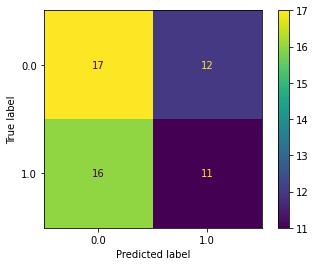

In [24]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(train_X, train_y)
pred_y = logreg.predict(test_X)

print('Accuracy of Logistic Regression Classifier on test set: {:.4f}'.format(logreg.score(test_X, test_y)))

print(precision_score(pred_y, test_y))
print(f1_score(pred_y, test_y))
print(recall_score(pred_y, test_y))

cm = confusion_matrix(test_y, pred_y, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
plt.show()


Accuracy of Logistic Regression Classifier on test set: 0.4643
0.4074074074074074
0.4230769230769231
0.44


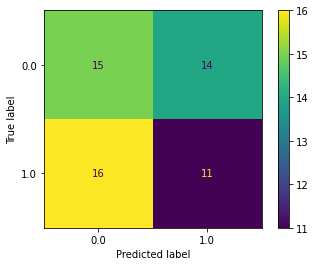

In [25]:
from sklearn import svm

model = svm.SVC()
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print('Accuracy of SVM Classifier on test set: {:.4f}'.format(accuracy_score(test_y, pred_y)))

print(precision_score(pred_y, test_y))
print(f1_score(pred_y, test_y))
print(recall_score(pred_y, test_y))

cm = confusion_matrix(test_y, pred_y, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
plt.show()



Accuracy of Logistic Regression Classifier on test set: 0.6250
0.9629629629629629
0.7123287671232876
0.5652173913043478


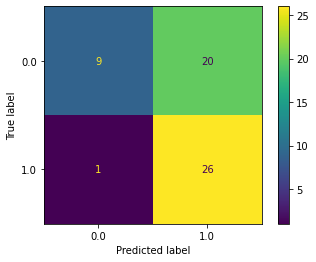

In [26]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(accuracy_score(test_y, pred_y)))

print(precision_score(pred_y, test_y))
print(f1_score(pred_y, test_y))
print(recall_score(pred_y, test_y))

cm = confusion_matrix(test_y, pred_y, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
plt.show()



Accuracy of Logistic Regression Classifier on test set: 0.5536
0.8888888888888888
0.6575342465753423
0.5217391304347826


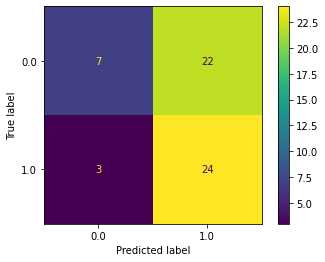

In [27]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=100)
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print('Accuracy of Adaboost Classifier on test set: {:.4f}'.format(accuracy_score(test_y, pred_y)))

print(precision_score(pred_y, test_y))
print(f1_score(pred_y, test_y))
print(recall_score(pred_y, test_y))

cm = confusion_matrix(test_y, pred_y, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy of Logistic Regression Classifier on test set: 0.4821
1.0
0.6506024096385542
0.48214285714285715


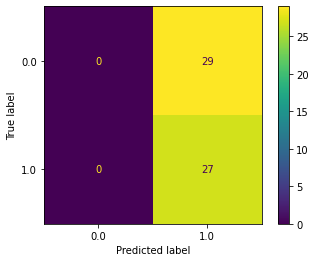

In [28]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='lbfgs', max_iter = 50000)
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print('Accuracy of MLP Classifier on test set: {:.4f}'.format(accuracy_score(test_y, pred_y)))

print(precision_score(pred_y, test_y))
print(f1_score(pred_y, test_y))
print(recall_score(pred_y, test_y))

cm = confusion_matrix(test_y, pred_y, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
plt.show()



Accuracy of MLP Classifier on test set: 0.4286
0.1111111111111111
0.15789473684210525
0.2727272727272727


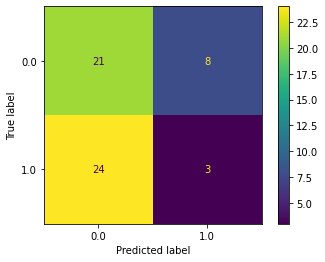

In [30]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='adam', max_iter = 50000)
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print('Accuracy of MLP Classifier on test set: {:.4f}'.format(accuracy_score(test_y, pred_y)))

print(precision_score(pred_y, test_y))
print(f1_score(pred_y, test_y))
print(recall_score(pred_y, test_y))

cm = confusion_matrix(test_y, pred_y, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
plt.show()



Accuracy of Logistic Regression Classifier on test set: 0.6607
0.7407407407407407
0.6779661016949152
0.625


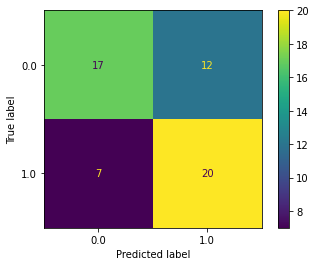

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(accuracy_score(test_y, pred_y)))

print(precision_score(pred_y, test_y))
print(f1_score(pred_y, test_y))
print(recall_score(pred_y, test_y))

cm = confusion_matrix(test_y, pred_y, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
plt.show()

